# Сборный проект

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Задача** — выявить определяющие успешность игры закономерности.

**Ход исследования**

Данные получим из файла:
- /datasets/games.csv.

О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных.  

Таким образом, исследование пройдёт в шесть этапов:
 1. Изучение данных.
 2. Предобработка данных.
 3. Исследовательский анализ данных.
 4. Составление портрета пользователя каждого региона
 5. Проверка гипотез.
 6. Вывод.

## Изучение данных

In [1]:
import pandas as pd #импорт библиотеки pandas
from scipy import stats as st #импорт библиотеки stats
from scipy.stats import levene #импорт библиотеки levene
import numpy as np #импорт библиотеки numpy
import plotly.express as px #импорт библиотеки plotly
import matplotlib.pyplot as plt #импорт библиотеки matplotlib
import plotly.graph_objs as go #импорт библиотеки plotly.graph_objs
import seaborn as sns #импорт библиотеки seaborn
df = pd.read_csv('/datasets/games.csv') #чтение файла с данными и сохранение в df

In [2]:
display(df.head(10)) #получение первых 10 строк таблицы df
print()
display(df.info()) #получение общей информации о данных в таблице df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

### Вывод

После первого ознакомления с данными видим несоответствие типов данных в столбце `Year_of_Release` и `User_Score`, также видим неправильный стиль названия стобцов и пропуски, в столбцах `Critic_Score` и `Rating` в большом количестве. 
С причиной их возникновения будем разбираться на следующих этапах.

Описание данных:

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Из описания проекта знаем, что данные за 2016 год могут быть неполными.

## Предобработка данных 

Сначала приведем названия столбцов к нижнему регистру.

In [3]:
df.columns = df.columns.str.lower() #приводим названия столбцов к нижнему регистру 
df.columns #проверка

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Далее разберемся с пропусками и проверим наличие дубликатов. 

In [4]:
df.isna().sum() #количество пропусков

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [5]:
df.isna().mean() #доля пропусков

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

In [6]:
df.duplicated().sum() #проверяем дубликаты

0

Явных дубликатов в данных не обнаружено.

Для начала посмотрим на пропуски в столбце `name`.

In [7]:
display(df.query('name.isna()')) #смотрим на пропуски в столбце name

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Видим, что пропуски в столбце `name` совпадают со столбцом `genre`, заполнить их не сможем поэтому примем решение их удалить. Данные игры были выпущены в 1993 году, так что вряд ли удаление этих строк можем повлиять на дальнейший анализ. 

In [8]:
df.drop(index = [659, 14244],axis = 0, inplace = True) #удаляем строки с пропусками

Посмотрим на пропуски в столбце `year_of_release`.

In [9]:
display(df.query('year_of_release.isna()')) #смотрим на пропуски в столбце year_of_release

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Какой-то явной взаимосвязи не обнаружено, пропуски в столбце `year_of_release` занимают всего 1,6%, но заполнить мы их не можем, поэтому примем решение их тоже удалить. 

In [10]:
df.dropna(subset=['year_of_release'], inplace = True) 
#удаляем строки с пропусками в столбце year_of_release

Пропуски в столбце `rating` занимают более чем 40% всех данных. Так как у нас данные представлены начиная с 1980 года, а ассоциация ESRB появилась только в 1994 году, пропуски в столбце `rating` вполне объяснимы. Однако, в дальнейшем анализе нам понадобится  оценивать влияние рейтинга ESRB на продажи в каждом регионе. Чтобы игры без рейтинга не оказались полностью исключенными из анализа, заменим пропуски на "no_rating".

In [11]:
df['rating'] = df['rating'].fillna('no_rating') #заполняем пропуски значением no_rating

Видим, что пропуски в столбцах `critic_score` и `user_score` представлены в большом количестве. Оценки критиков и пользователей носят неоднозначный характер, возможно начиная с 1980 года еще не было правила оценивать игры и данная процедура появилась сильно позже, с развитием игровой индустрии. Но также вероятно, что данные были не заполнены случайно.

В любом случае, всякое заполнение пропусков приведет к искажению данных, поэтому оставим их нетронутыми. 

Далее поменяем тип данных в столбцах `year_of_release` и `critic_score` на Int, `user_score` на Float.

In [12]:
df['year_of_release'] = df['year_of_release'].astype('Int64') #меняем тип данных 
df['critic_score'] = df['critic_score'].astype('Int64') #меняем тип данных 

В столбце `user_score` присутствует аббревиатура 'tbd', что означает 'to be determined', то есть 'Подлежит определению'. Заменим 'tbd' на NaN и преобразуем тип данных в столбце на float. 

In [13]:
df['user_score'] = df['user_score'].replace("tbd", np.NaN).astype('float64') #меняем тип данных 

In [14]:
df.info() # проверяем результат исправления типов данных

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   Int64  
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.5+ MB


In [15]:
df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales'] 
#добавляем столбец с суммарными продажами во всех регионах

### Вывод

Мы исправили названия столбцов, удалили пропуски в столбцах `name`, `genre` и `year_of_release`, заполнили пропуски в столбце `rating` на "no_rating",
преобразовали тип данных в столбцах `user_score`, `critic_score` и `year_of_release`, и добавили новый столбец `sum_sales` с суммарными продажами во всех регионах.

## Исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы

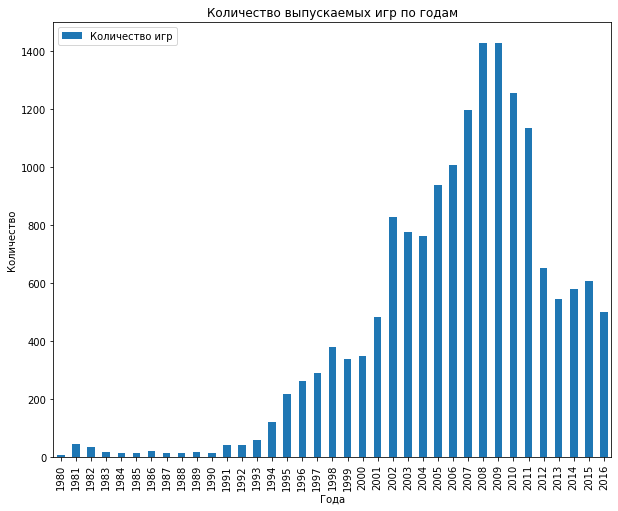

In [16]:
df.groupby(['year_of_release'])['name'].count().plot.bar(figsize=(10,8)) 
#строим гистограмму кол-ва выпускаемых игр по годам
plt.title('Количество выпускаемых игр по годам')
plt.legend(['Количество игр'])
plt.xlabel('Года')
plt.ylabel('Количество')
plt.show()

Видим явную тенденцию роста количества выпускаемых игр начиная с 1994 года, и более резкий рост начиная с 2000 года.

Также прослеживается не менее резкий спад с 2010 года вплоть до 2012 года, после которого 
количество выпускаемых игр в год примерно на одном уровне. Столь резкое падение может быть обусловлено стремительным развитием мобильных приложений на платформах iOS и Android, а также некий переход на онлайн игры.

### Посмотрим, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Так как нам нужно выявить потенциально популярный продукт и спланировать рекламные кампании на 2017 год, будем брать во внимание только данные с 2012 по 2016 год. Анализировать предшествующие года будет не информативно. 

In [17]:
df_year = df[df['year_of_release'] >= 2012] #делаем срез данных начиная с 2012 года

In [18]:
df_year.groupby(['platform'])['sum_sales'].sum().sort_values(ascending=False).to_frame().head(10).reset_index()

,platform,sum_sales
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32
5,WiiU,82.19
6,PC,62.65
7,PSV,49.18
8,Wii,35.37
9,DS,12.55


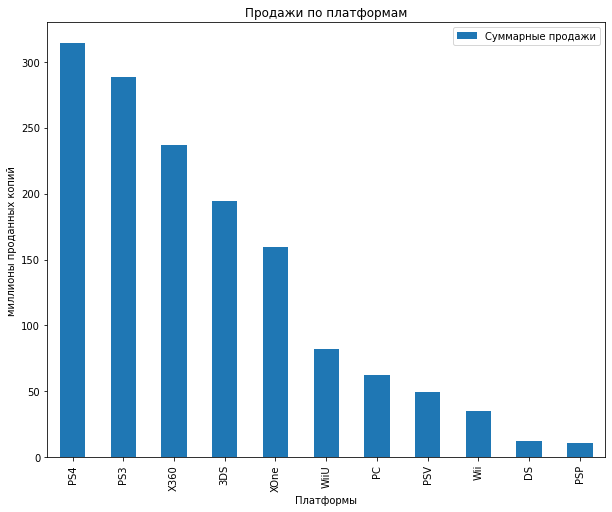

In [19]:
df_year.groupby(['platform'])['sum_sales'].sum().sort_values(ascending=False).plot.bar(figsize=(10,8))
#строим гистограмму суммарных продаж выпускаемых игр по платформам
plt.title('Продажи по платформам')
plt.legend(['Суммарные продажи'])
plt.xlabel('Платформы')
plt.ylabel('миллионы проданных копий')
plt.show()

На графике явно наблюдаем самые "продаваемые" платформы, это PS4, PS3, X360, 3DS и XOne. Далее наблюдаем заметный спад в продажах. Поэтому остановимся на этих пяти платформах для дальнейшего анализа. 

Построим распределение по годам для платформ с наибольшими суммарными продажами.

In [20]:
df_platform = df_year[df_year['platform'].isin(['PS4', 'PS3', 'X360', '3DS','XOne'])] 
#делаем срез данных, включающий только платформы PS4, PS3, X360, 3DS и XOne

In [1]:
fig = px.bar(df_platform, x='year_of_release', y='sum_sales', color='platform', barmode='group')
#строим график распределения по годам для платформ с наибольшими суммарными продажами
fig.update_layout(
    title_text='Распределение по годам для платформ с наибольшими суммарными продажами', 
    xaxis_title_text='Года', 
    yaxis_title_text='Общие продажи'
)

NameError: name 'px' is not defined

По графику видим, что для каждой платформы характерно примерно 5 лет прибывания на рынке.
 - PS3 с 2012 по 2016, ровно 5 лет, пик продаж приходится на 2013 год.
 - X360 с 2012 по 2016 (5 лет), пик продаж приходится на 2012 год. 
 - 3DS с 2012 по 2016 (5 лет), пик продаж приходится на 2013 год. 
 - PS4 с 2013 - 2016 (4 года), пик продаж приходится на 2015 г
 - XOne с 2013 - 2016 (4 года), пик продаж приходится на 2015 г
 
Можем отметить двух явных лидеров по суммарным продажам PS3 и PS4, также видно, как постепенно PS4 смещает с рынка PS3. Еще можем отметить достаточно хорошие продажи у платформы X360, которая на протяжении всего рассматриваемого периода идет почти "ногу в ногу" с PS3. 

### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

На основании предыдущих выводов отфильтруем наши данные, будем рассматривать данные начиная с 2012 года.

In [22]:
df= df[df['year_of_release'] >= 2012] #делаем фильтр исходной таблицы 
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,no_rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,no_rating,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79


In [23]:
fig = px.histogram(df, x = 'year_of_release', y= 'sum_sales', color = 'platform')
#строим график общих продаж по годам
fig.update_layout(
    title_text='Продажи по годам', 
    xaxis_title_text='Год', 
    yaxis_title_text='Общие продажи', 
    bargap=0.1, 
    bargroupgap=0.1
)

По графику видно, что на конец 2016 года лидируют по продажам три платформы:
- PS4
- Xone
- 3DS

Но в то же время даже продажи этих трех платформ все равно падают. Из описания проекта мы знаем, что за 2016 год данные предствалены не полные, так что судить о продажах в 2016 году будет некорректно. 

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат

На предыдущем шаге мы выявили три потенциально прибыльные платформы PS4, Xone и 3DS.
Построим ящик с усами для указаных платформ. 

In [24]:
df_top_platform = df_year[df_year['platform'].isin(['PS4', 'XOne', '3DS'])] 

In [25]:
fig = px.box(df_top_platform, x='platform', y='sum_sales', color='platform')
#строим график распределения по годам для платформ с наибольшими суммарными продажами
fig.update_layout(
    title_text='Продажи по самым прибыльным платформам', 
    xaxis_title_text='Платформы', 
    yaxis_title_text='Общие продажи', 
    yaxis=dict(range=[0,1])
)

Практически на одном уровне продажи у XOne и PS4, значительно отстает среди лидеров платформа 3DS.

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы. Соотнесите выводы с продажами игр на других платформах.

 Мы выяснили на шаге 3.3, что самой продаваемой платформой на 2016 год является PS4, её и будем рассматривать в данном вопросе.

              sum_sales  critic_score  user_score
sum_sales      1.000000      0.406568   -0.031957
critic_score   0.406568      1.000000    0.557654
user_score    -0.031957      0.557654    1.000000


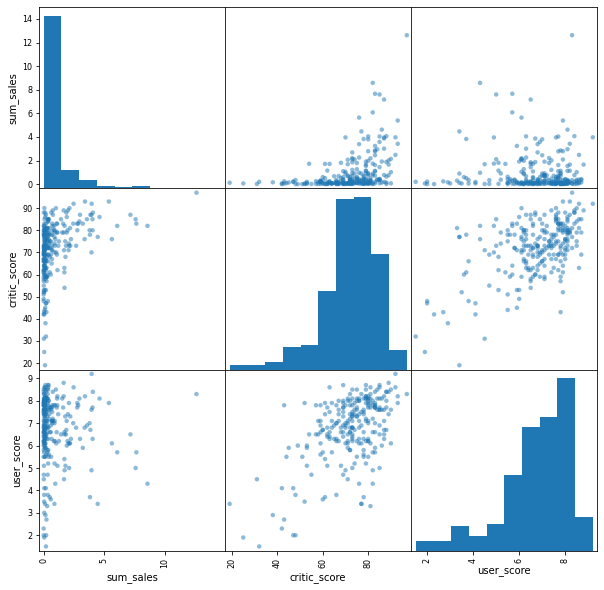

In [26]:
corr_PS4 = df[df.platform == 'PS4'][['sum_sales', 'critic_score', 'user_score']]
#строим матрицу корреляции
print(corr_PS4.corr())
pd.plotting.scatter_matrix(corr_PS4, figsize=(10,10), s=80)
plt.show()

In [33]:
mask = np.triu(np.ones_like(corr, dtype=bool))
corr_PS4 = corr_PS4.mask(mask)
fig = px.imshow(corr_PS4, text_auto=True)
fig.layout.height = 1000
fig.layout.width = 1000
fig.show()


NameError: name 'corr' is not defined

На диаграмме видим зависимость общих продаж от оценки критиков, также это подтверждает корреляция 0.4, не сильно большая, но есть.
И по диаграмме и по корреляции видим, что оценка пользователей особо не влияет на продажи, что вызывает подозрения.
С одной стороны логично, чем выше оценка критика, тем больше пользователей захотят приобрести игру. Но с другой стороны оценка пользователей также должна иметь свой вес, чему мы не нашли явного подтверждения.

Для сравления посмотрим на матрицу корреляции для двух других самых продаваемых платформ.

In [27]:
corr_XOne = df[df.platform == 'XOne'][['sum_sales', 'critic_score', 'user_score']]
print(corr_XOne.corr()) #строим матрицу корреляции для XOne

              sum_sales  critic_score  user_score
sum_sales      1.000000      0.416998   -0.068925
critic_score   0.416998      1.000000    0.472462
user_score    -0.068925      0.472462    1.000000


In [28]:
corr_3DS = df[df.platform == '3DS'][['sum_sales', 'critic_score', 'user_score']]
print(corr_3DS.corr()) #строим матрицу корреляции 3DS

              sum_sales  critic_score  user_score
sum_sales      1.000000      0.320803    0.197583
critic_score   0.320803      1.000000    0.722762
user_score     0.197583      0.722762    1.000000


Для платформ XOne и 3DS также наблюдаем зависимость общих продаж от оценки критиков, примерно на одном уровне. Следует отметить, что для платформы 3DS замечается чуть большая зависимость от оценки пользователей, но все равно решающая.

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [29]:
fig = px.pie(df, names='genre', 
             title='Распределение игр по жанрам') #строим диаграмму распределения игр по жанрам
fig.show()

По диаграмме видим, что приобладает жанр Action, Role-Playning, затем идут Adventure, Sports,  и Shooter.
 
Посмотрим на суммарные продажи по всем жанрам.

Для выявления наиболее прибыльного жанра проверим средние и медианные продажи для каждого и построим диаграмму.

In [30]:
genre_sum_sales = df.pivot_table(index='genre', values='sum_sales', aggfunc=['mean']).reset_index()
genre_sum_sales.columns = ['genre','mean']
genre_sum_sales.sort_values('mean', ascending=False).head(10)

,genre,mean
8,Shooter,1.296723
4,Platform,0.717647
10,Sports,0.675634
7,Role-Playing,0.521081
6,Racing,0.465217
3,Misc,0.442917
9,Simulation,0.439000
0,Action,0.427856
2,Fighting,0.408165
11,Strategy,0.187887


In [31]:
fig = px.pie(genre_sum_sales, values='mean', names='genre',
             title='Суммарные средние продажи игр по жанрам') #строим диаграмму распределения игр по жанрам
fig.show()

Распределение по продажам показывает, что игры жанра Shooter продаются лучше всего, в то время как он занимает пятое место среди общего распределения игр по жанрам. На втором месте появляется жанр Platform, который также среди общего распределения находится практически на последних местах. 

Sports идет на третьем месте практически также, как и в первой диаграмме. Соотношение общего количества игр к продажам вполне нормальное именно для этого жанра.

Не можем не отметить, разительную разницу между количеством игр жанра Action и его средними продажами. Можем предположить, что для этого жанра храктерно очень большое количество маленьких игр с низкими продажами.


### Вывод

Мы проанализировали количество выпускаемых игр по годам и заметили явную тенденцию роста начиная с 1994 года. Также прослеживается не менее резкий спад с 2010 года вплоть до 2012 года, после которого количество выпускаемых игр в год примерно на одном уровне. Столь резкое падение может быть обусловлено стремительным развитием мобильных приложений на платформах iOS и Android, а также некий переход на онлайн игры..

Также мы посмотрели, как менялись продажи по платформам и выбрали пять платформ с наибольшими суммарными продажами - PS4, PS3, X360, 3DS и XOne и постройли распределение по годам. Мы выяснили, что в среднем для каждой платформы характерно примерно 5 лет прибывания на рынке.

Еще мы выявили три платформы, которые лидируют по продажам - это PS4, XОne и 3DS. И построили график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Это дало нам понять, что наибольшие медианные продажи у платформ X360 и PS3. 

Общее распределение игр по жанрам показало, что по количеству на рынке приобладает жанр  Action. Затем идут Role-Playning, Adventure, Sports, и Shooter. Однако, распределение по продажам показывает, что игры жанра Shooter продаются лучше всего, в то время как он занимает пятое место среди общего распределения игр по жанрам. На втором месте появляется жанр Platform. 
Sports идет на третьем месте по продажам, как и в общем распределении. Соотношение общего количества игр к продажам вполне нормальное именно для этого жанра.

## Составление портрета пользователя каждого региона

В этом разделе мы определим для пользователя каждого региона (NA, EU, JP):
 - Самые популярные платформы (топ-5)
 - Самые популярные жанры (топ-5)
 - Выясним, влияет ли рейтинг ESRB на продажи в отдельном регионе

**1. Самые популярные платформы (топ-5). Опишите различия в долях продаж.**

In [32]:
top_platform_na_sales = df.groupby(['platform'])['na_sales'].sum().sort_values(ascending=False).head().reset_index()
#строим гистограмму Топ-5 самых популярных платформ в Америке
fig = px.histogram(top_platform_na_sales, x='platform', y='na_sales', color='platform')
fig.update_layout(
    title_text='Топ-5 платформ в Северной Америке', 
    xaxis_title_text='Платформы', 
    yaxis_title_text='Продажи'
)

In [1]:
top_platform_eu_sales = df.groupby(['platform'])['eu_sales'].sum().sort_values(ascending=False).head().reset_index()
#строим гистограмму Топ-5 самых популярных платформ в Америке
fig = px.histogram(top_platform_eu_sales, x='platform', y='eu_sales', color='platform')
fig.update_layout(
    title_text='Топ-5 платформ в Европе', 
    xaxis_title_text='Платформы', 
    yaxis_title_text='Продажи'
)

NameError: name 'df' is not defined

In [34]:
top_platform_jp_sales = df.groupby(['platform'])['jp_sales'].sum().sort_values(ascending=False).head().reset_index()
#строим гистограмму Топ-5 самых популярных платформ в Америке
fig = px.histogram(top_platform_jp_sales, x='platform', y='jp_sales', color='platform')
fig.update_layout(
    title_text='Топ-5 платформ в Японии', 
    xaxis_title_text='Платформы', 
    yaxis_title_text='Продажи'
)

В Америке самой популярной платформой является Х360, в то время как в Европе PS4. В целом видим одни и те же платформы, с небольшой разницей в продажах.
В Японии же самой популярной считается платформа 3DS, которая занимает 5-е место в Европе и Америке.  

Самые высокие продажи наблюдаются в Америке, где скорее всего более востребован рынок компьютерных игр. В Европе наблюдается некоторый спад количества продаж, в Японии же видим самую маленькую долю продаж, что может быть обусловлено наименьшим населением среди рассматриваемых регионов. 

**2. Самые популярные жанры (топ-5). Поясните разницу.**

In [35]:
top_genre_na_sales = df.groupby(['genre'])['na_sales'].sum().sort_values(ascending=False).head().reset_index()
#строим гистограмму Топ-5 самых популярных жанров в Америке
fig = px.histogram(top_genre_na_sales, x='genre', y='na_sales', color='genre')
fig.update_layout(
    title_text='Топ-5 жанров в Северной Америке', 
    xaxis_title_text='Платформы', 
    yaxis_title_text='Продажи'
)

In [36]:
top_genre_eu_sales = df.groupby(['genre'])['eu_sales'].sum().sort_values(ascending=False).head().reset_index()
#строим гистограмму Топ-5 самых популярных жанров в Европе
fig = px.histogram(top_genre_eu_sales, x='genre', y='eu_sales', color='genre')
fig.update_layout(
    title_text='Топ-5 жанров в Европе', 
    xaxis_title_text='Платформы', 
    yaxis_title_text='Продажи'
)

In [37]:
top_genre_jp_sales = df.groupby(['genre'])['jp_sales'].sum().sort_values(ascending=False).head().reset_index()
#строим гистограмму Топ-5 самых популярных жанров в Японии
fig = px.histogram(top_genre_jp_sales, x='genre', y='jp_sales', color='genre')
fig.update_layout(
    title_text='Топ-5 жанров в Японии', 
    xaxis_title_text='Платформы', 
    yaxis_title_text='Продажи'
)

Видим, что в Америке и Европе практически одинаковые интересы, касаемые жанров игр. У обоих на первом месте жанр Action, в то время как в Японии Action сместил жанр Role-Playing.

**3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

Приведем описание рейтингов для удобства работы:
- EC («Early Childhood»)	«EC» («Early childhood») — «Для детей младшего возраста».
- E («Everyone») — «Для всех».
- E10+ («Everyone 10 and older») — «Для всех старше 10 лет».
- T («Teen») — «Подросткам».
- M («Mature»)- «От 17 лет».
- AO («Adults Only 18+») — «Только для взрослых».
- RP («Rating Pending») — «Рейтинг ожидается».
- K-A» («Kids to Adults»)— «Для детей и взрослых».

In [38]:
rating_na_sales = df.groupby(['rating'])['na_sales'].sum().sort_values(ascending=False).head().reset_index()
#строим гистограмму для продаж в Америке с учетом рейтинга ESRB
fig = px.histogram(rating_na_sales, x='rating', y='na_sales', color='rating')
fig.update_layout(
    title_text='Рейтинг ESRB в Северной Америке', 
    xaxis_title_text='Платформы', 
    yaxis_title_text='Продажи'
)

In [39]:
rating_eu_sales = df.groupby(['rating'])['eu_sales'].sum().sort_values(ascending=False).head().reset_index()
#строим гистограмму для продаж в Европе с учетом рейтинга ESRB
fig = px.histogram(rating_eu_sales, x='rating', y='eu_sales', color='rating')
fig.update_layout(
    title_text='Рейтинг ESRB в Европе', 
    xaxis_title_text='Платформы', 
    yaxis_title_text='Продажи'
)

In [40]:
rating_jp_sales = df.groupby(['rating'])['jp_sales'].sum().sort_values(ascending=False).head().reset_index()
#строим гистограмму для продаж в Японии с учетом рейтинга ESRB
fig = px.histogram(rating_jp_sales, x='rating', y='jp_sales', color='rating')
fig.update_layout(
    title_text='Рейтинг ESRB в Японии', 
    xaxis_title_text='Платформы', 
    yaxis_title_text='Продажи'
)

Снова наблюдаем практически одинаковую картину для Америки и Европы. На первом месте игры с рейтингом «От 17 лет», далее «Для всех», на третьем месте появляются игры без рейтинга, затем «Для всех старше 10 лет» и «Подросткам». 

Видим, что в Японии на первом месте по продажам игры, для которых рейтинг не был обозначен, причем такие игры продаются в разы лучше остальных. На втором месте игры с рейтингом «Для всех», затем «Подросткам» и «От 17 лет».

### Вывод

На данном этапе мы составили Топ-5 самых популярных платформ и жанров для пользователей каждого региона (NA, EU, JP). В Северной Америке самой популярной платформой является Х360, в Европе - PS4, а в Японии 3DS. Также мы выяснили, что в Америке и Европе на первом месте по продажам находится жанр Action, а в Японии жанр Action сместил Role-Playing.

Также мы выяснили, что в Америке и Европе на первом месте игры с рейтингом «От 17 лет», далее «Для всех», на третьем месте появляются игры без рейтинга, затем «Для всех старше 10 лет» и «Подросткам». В Японии на первом месте по продажам игры, для которых рейтинг не был обозначен, причем такие игры продаются в разы лучше остальных. На втором месте игры с рейтингом «Для всех», затем «Подросткам» и «От 17 лет»

## Проверка гипотез

 Нам нужно проверить две гипотизы:
 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
 

### Гипотеза №1

**Нулевая гипотеза** будет звучать так - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Альтернативная** - Средние пользовательские рейтинги платформ Xbox One и PC различаются.

Зададим критический уровень статистической значимости alpha = .05

In [41]:
sample_1 = df[df['platform']=='XOne']['user_score'].dropna() #делаем срез данных для XOne
sample_2 = df[df['platform']=='PC']['user_score'].dropna() #делаем срез данных для PC

Сделаем тест Левене для оценки равенства дисперсий.

In [42]:
stat, p = levene(sample_1, sample_2)
print('p-значение: ', p)

p-значение:  0.01251484281850554


Значение p по тесту Левене достаточно большое, можем считать дисперсии равными и не добавлять параметр equal_var = False.

In [43]:
alpha = .05 #задаем критический уровень статистической значимости
results = st.ttest_ind(
    sample_1, 
    sample_2)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


Для выбранного уровня значимости - Отвергаем нулевую гипотезу. Следовательно можно сделать вывод, что средние пользовательские рейтинги платформ Xbox One и PC различаются. Гипотеза не подтвердилилась. 

### Гипотеза №2

**Нулевая гипотеза** будет звучать так - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Альтернативная** - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.

Зададим критический уровень статистической значимости alpha = .05

In [44]:
sample_3 = df[df['genre']=='Action']['user_score'].dropna() #делаем срез данных для жанра Action
sample_4 = df[df['genre']=='Sports']['user_score'].dropna() #делаем срез данных для жанра Sports

Сделаем тест Левене для оценки равенства дисперсий.

In [45]:
stat, p = levene(sample_3, sample_4)
print('p-значение: ', p)

p-значение:  1.3125789036876737e-05


Значение p по тесту Левене не большое, следовательно, будем считать дисперсии отличающимися. Добавим в тест значение equal_var = False

In [46]:
alpha = .05 #задаем критический уровень статистической значимости
results = st.ttest_ind(
    sample_3, 
    sample_4,
    equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


Тест показал, что оценки пользователей игр жанров Action и Sports одинаковые. Вторая гипотеза также не подтвердилась.

## Общий вывод

В ходе этого анализа мы предобработали исходные данные -  исправили названия столбцов, удалили пропуски в столбцах name, genre и year_of_release, заполнили пропуски в столбце rating на "no_rating", преобразовали тип данных в столбцах user_score, critic_score и year_of_release, и добавили новый столбец sum_sales с суммарными продажами во всех регионах.

Мы проанализировали количество выпускаемых игр по годам и заметили явную тенденцию роста начиная с 1994 года. Также прослеживается не менее резкий спад с 2010 года вплоть до 2012 года, после которого количество выпускаемых игр в год примерно на одном уровне. Посмотрели, как менялись продажи по платформам и выбрали пять платформ с наибольшими суммарными продажами - PS4, PS3, X360, 3DS и XOne, постройли распределение по годам. Выяснили, что в среднем для каждой платформы характерно примерно 5 лет прибывания на рынке. Еще мы выявили три платформы, которые лидируют по продажам - это PS4, XОne и 3DS. Нашли платформы с наибольшими продажами - X360 и PS3. Построили распределение игр по жанрам, которое показало, что в играх приобладает жанр Action, затем идут Role-Playning, Adventure, Sports, и Shooter

Еще мы составили Топ-5 самых популярных платформ и жанров для пользователей каждого региона (NA, EU, JP). В Северной Америке самой популярной платформой является Х360, в Европе - PS4, а в Японии 3DS. Также мы выяснили, что в Америке и Европе на первом месте по продажам находится жанр Action, а в Японии жанр Action сместил Role-Playing. Также мы выяснили, что в Америке и Европе на первом месте игры с рейтингом «От 17 лет», далее «Для всех», на третьем месте появляются игры без рейтинга, затем «Для всех старше 10 лет» и «Подросткам». В Японии на первом месте по продажам игры, для которых рейтинг не был обозначен, причем такие игры продаются в разы лучше остальных. На втором месте игры с рейтингом «Для всех», затем «Подросткам» и «От 17 лет»

В завершении анализа мы проверили две гипотизы и сделали вывод, что средние пользовательские рейтинги платформ Xbox One и PC различаются, а средние пользовательские рейтинги жанров Action  и Sports одинаковые. 

В целом можем сказать, что определяющими успешность игры закономерностями можно назвать жанр, так как мы выявили несколько фаворитов, на которых в целом делится рынок игр, также можно ориентироваться на оценку критиков.